<a href="https://colab.research.google.com/github/tomheyden/Assignment-2/blob/main/Kopie_von_Assignment2_ATIT22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
Group assignment with groups of 5 people. (30 points in total)

This assignment will focus on multi class classifaction problems.
There are three different techniques which should be applied:

*   Softmax Regression (Multi-Class Logist Regression)
*   Decision Tree Classifier
*   KNN Classifier (& Logistic Regression)





---




## Part 1: Softmax Regression

(5 points)

Your task is to train a softmax regression model on the MNIST dataset to classify images of handwritten digits from 0 to 9.


In [1]:
# load required libraries
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The task will be to perform classification on handwritten digits from 0 to 9 (MNIST dataset).

In [2]:
# download dataset from https://www.openml.org/ which contains many sample datasets for machine learning
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

The dataset contains 70000 examples of which each example has 784 values (pixels). These pixels are in a flat array but represent a 28 by 28 pixel gray-scale image. Values range from 0 to 255 which is common in the RGB value range. A value of 0 represents a black pixel whereas 255 represents a white pixel. Different shades of gray are any value larger than 0 but smaller than 255.

### Data exploration

Look at some examples of handwritten digits in the dataset to familiarize yourself with the data you want to train the model on.

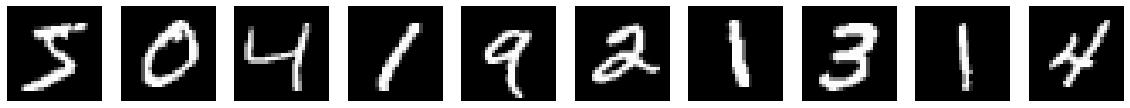

In [3]:

X_reshape = np.array(X).reshape(X.shape[0],28,28,1)

f, axes = plt.subplots(1, 10, sharey=True,figsize=(20,20))

for i,ax in enumerate(axes.flat):

    ax.axis('off')

    ax.imshow(X_reshape[i,:,:,0],cmap="gray")

### Data preparation

Perform a train test split using sklearn.model_selection.train_test_split (as it was done in the previous assignment).

In [4]:

#X = X.to_numpy()
#y = y.to_numpy()

#X_train, X_test = train_test_split(X, train_size = 0.8, test_size = 0.2, random_state = 100)

x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


Do feature scaling

In [5]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Is feature scaling actually necessary in this case? Please elaborate why or why not:

**--> Your answer here**

### Training the models

Please use LogisticRegression from sklearn.linear_model. When initialising the LogisticRegression model please set the parameter "multi_class" to "multinomial" to make sure your LogisticRegression model perform a multiclass classification instead of a binary classification. More information here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [6]:
logreg = LogisticRegression(fit_intercept=True,
                        multi_class='auto')

In [7]:
%%time
logreg.fit(x_train, y_train)

CPU times: user 1min 16s, sys: 8.1 s, total: 1min 25s
Wall time: 46.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Evaluating model performance

Please analyze the model accuracy and plot the confusion matrix.

In [8]:
logreg.predict(x_test[0:10])

predictions = logreg.predict(x_test)
predictions.shape

(10000,)

In [9]:
score = logreg.score(x_test, y_test)
score

0.9255

Confusion Matrix
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


<Figure size 432x288 with 0 Axes>

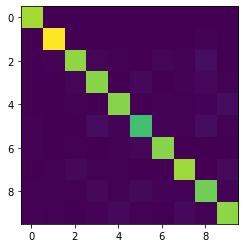

In [10]:
from sklearn import metrics
#confusion matrix

confusion = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(confusion)

plt.figure()
#lot_confusion_matrix(confusion);
plt.show();

cm = confusion_matrix(y_test, predictions)

plt.imshow(cm)


Based on the confusion matrix, where do you expect the model to make good decisions? Where is the classification shaky?

**---> Your answer here**


### Visualizing what the model has learned

Use the following code to visualize the coefficients the trained model has learned.
You simply need to replace the <<model>> placeholder with the variable name of your trained model.

Text(0.5, 0.98, 'Coefficients for various classes')

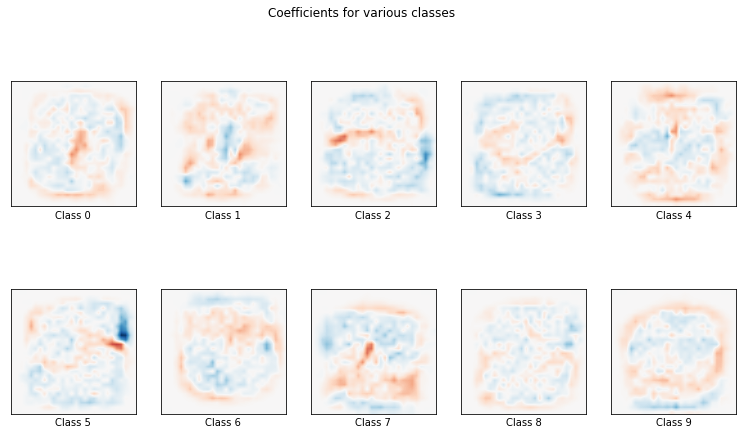

In [14]:
coef = logreg.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes')

Try to explain briefly what the coefficients tell you about how the model differentiate the different classes.

**--> your answer here**


Plot some examples of missclassified numbers.

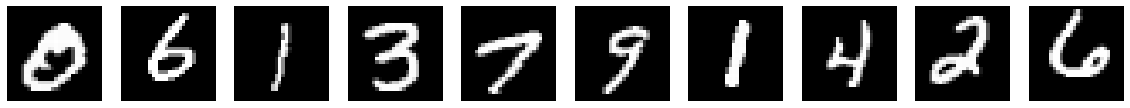

In [42]:
misclassified = np.where(y_test!= predictions)[0]

f, axes = plt.subplots(1, 10, sharey=True,figsize=(20,20))

for i,ax in enumerate(axes.flat):

    ax.axis('off')
    index = index+1

    ax.imshow(X_reshape[misclassified[index],:,:,0],cmap="gray")



---



## Part 2: Decission Tree Classifier

(5 points)

Your task is to train a decision tree classifier on the heart disease dataset from the UCI Machine Learning repository [https://archive.ics.uci.edu/ml/datasets/abalone. ](https://archive.ics.uci.edu/ml/datasets/heart+disease)

Your task is to decide if a person has a heart disease based on some other attributes.
Target class has two vales:
- 0 : no heart disease (healthy)
- 1 : heart disease



In [44]:
# load required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# download data set
dtdf = pd.read_csv('https://raw.githubusercontent.com/schneiderson/ATIT2-22/main/sample_data/heart.csv', sep=",")
X=dtdf.iloc[:,:-1]
y=dtdf.iloc[:, -1].values.reshape(-1)

### Data exploration

Familiarize yourself with the dataset. Look at the different features available for making a classification decision. 

### Data preparation

Perform a train test split using sklearn.model_selection.train_test_split (as it was done in the previous assignment).
Since the dataset doesn't cotain that many instances, leave 40% of the data as a test set and 60% for the training set.

Do feature scaling

Is feature scaling actually necessary in this case? Please elaborate why or why not:

**--> your answer here**

### Training the model


Train the decision tree model on your training data. Use the DecisionTreeClassifier class from the sklearn.tree package.

### Evaluating model performance

Please evaluate the model performance based on its accuracy score and the confusion matrix on the test-set.

### Visualizing the decision tree

To learn how to plot a trained decision tree, please refer to the notebook https://github.com/schneiderson/ATIT2-21/blob/master/intro/DecisionTreeClassifierExample.ipynb.

### Regularization

Use the "max_depth" parameter, train the decision tree for values [1, 3, 5, 7] and plot the corresponding training and test accuracies.

Afterwards, use the "max_leaf_nodes" parameter (not using the "max_depth" parameter) for the values of [2, 4, 10] and plot the corresponding training and test accuracies.



---


## Part 3: KNN Classifier

(20 Points)

### Adult income dataset

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

More information about the dataset can be found here: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html 


In [ ]:
# import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dtdf = pd.read_csv('https://raw.githubusercontent.com/schneiderson/ATIT2-22/main/sample_data/adult.csv', sep=",")
X=dtdf.iloc[:,:-1]
y=dtdf.iloc[:, -1].values.reshape(-1)

### Data Exploration

Familiarize yourself with the dataset. Take a look at the class distribution.

Do some features have strange values?
If yes, could it be problematic during training and how could you deal with those values?

**--> your answer here**

### Data preparation

Do label encooding on the target variable and on independent variables.

Perform a train test split using sklearn.model_selection.train_test_split (as it was done in the previous assignment). Leave 20% of the data as a test set and 80% for the training set.

Do feature scaling

Is feature scaling actually necessary in this case? Please elaborate why or why not:

**--> your answer here**

### Training the model

### Evaluating model performance

Evaluate the model performance using the classification accuracy. Also plot the confusion matrix.

### Regularization

Train the KNN model with different values for K [1, 3, 5, 8, 10].
Compare and plot the training and test accuracy of the KNN classifier for each value of k.

Pick the model K which achieved the highest accuracy. Use the plot_roc_curve function to plot the ROC curve for the model with value K which achieved the highest accuracy.

---

### Train a logistic regression model on the same dataset and compare the performance 

In the previous assignment you have used a logistic regression model for classification. Try to train a logistic regression model on current dataset and compare the performance with the KNN classifier.

Create accuracy score, confusion matrix and ROC curve for the logistic regression classifier. Compare the metrics with the metrics of the KNN model.